In [0]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#Loading Data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


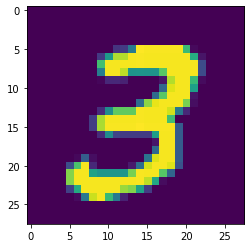

In [0]:
plt.imshow(train_images[7])

In [0]:
#Shapes of the dataset
print('train_images.shape: ', train_images.shape)
print('train_labels.shape: ', train_labels.shape)
print('test_images.shape: ', test_images.shape)
print('test_labels.shape: ', test_labels.shape)

train_images.shape:  (60000, 28, 28)
train_labels.shape:  (60000,)
test_images.shape:  (10000, 28, 28)
test_labels.shape:  (10000,)


In [0]:
train_labels[7]

3

In [0]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
train_labels[7]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

#Dense Model

In [0]:
# Initializes a sequential model
dense_model = models.Sequential()

# First layer
dense_model.add(layers.Dense(64, activation='relu', input_shape=(784,)))

# Second layer
dense_model.add(layers.Dense(64, activation='relu'))

# Output layer
dense_model.add(layers.Dense(10, activation='softmax'))
dense_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile the model
dense_model.compile(optimizer='adam', 
           loss='categorical_crossentropy', 
           metrics=['accuracy'])

In [0]:
# Reshape the data to two-dimensional array
dense_train_data = train_images.reshape(train_images.shape[0], 784)

# Reshape the data to two-dimensional array
dense_test_images = test_images.reshape(test_images.shape[0], 784)

# Fit the model
dense_model.fit(dense_train_data, train_labels, validation_split=0.2, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2802 - accuracy: 0.9294 - val_loss: 0.2792 - val_accuracy: 0.9331
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2523 - accuracy: 0.9354 - val_loss: 0.2640 - val_accuracy: 0.9364
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2240 - accuracy: 0.9409 - val_loss: 0.2320 - val_accuracy: 0.9430
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2026 - accuracy: 0.9458 - val_loss: 0.2315 - val_accuracy: 0.9385
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1843 - accuracy: 0.9501 - val_loss: 0.2272 - val_accuracy: 0.9439


In [0]:
# Evaluate the model
dense_model.evaluate(dense_test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.2290 - accuracy: 0.9424


[0.2289620041847229, 0.9423999786376953]

# CNN


In [0]:
# Initializes a sequential model
model = models.Sequential()

# Adding a 2D Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Adding 1st Max Pooling Layer
model.add(layers.MaxPooling2D((2, 2)))

# Adding 2nd 2D Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))

# Adding 2nd Max Pooling Layer
model.add(layers.MaxPooling2D((2, 2)))

# Adding 3rd 2D Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Adding a flattening layer to convert Filter maps into 1D Tensor
model.add(layers.Flatten())

# Adding Dense Layer before the outpur layer
model.add(layers.Dense(64, activation='relu'))

# Output Layer
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [0]:
# Reshape the Train Image Array for compatible with CNN
train_images = train_images.reshape((60000, 28, 28, 1))

# Normalizing the Train Images
train_images = train_images.astype('float32') / 255

# Reshape the Test Image Array for compatible with CNN
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalizing the Test Images
test_images = test_images.astype('float32') / 255


In [0]:
#Compiling the CNN Model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#Fitting the CNN Model
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 57s 61ms/step - loss: 1.2444 - accuracy: 0.5675
Epoch 2/5
938/938 [==============================] - 57s 60ms/step - loss: 0.3009 - accuracy: 0.9084
Epoch 3/5
938/938 [==============================] - 57s 61ms/step - loss: 0.1663 - accuracy: 0.9487
Epoch 4/5
938/938 [==============================] - 57s 61ms/step - loss: 0.1078 - accuracy: 0.9660
Epoch 5/5
938/938 [==============================] - 57s 61ms/step - loss: 0.0818 - accuracy: 0.9746


In [0]:
#Evaluate the CNN Model
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 11ms/step - loss: 0.1181 - accuracy: 0.9611


In [0]:
test_acc

0.9905999898910522